# Esercitazione 8 

## Esercizio 1

Calcolo $<H>$ con un metodo a blocchi, utilizzando $M = 10^5$ valori. Eseguo 100 step dell'algoritmo di Metropolis impostando $\delta =3.2$ per avere un'accettanza del 50%.

## Esercizio 2
### Punto 1

Eseguo ora una grid search (eseguita con lo script _es2.py_) per trovare i valori ottimali per $\mu$ e $\sigma$. Ottengo $\mu = 0.79$ e $\sigma = 0.61$, che utilizzo per eseguire la simulazione del calcolo di $<H>$ al variare del numero di blocchi MC.

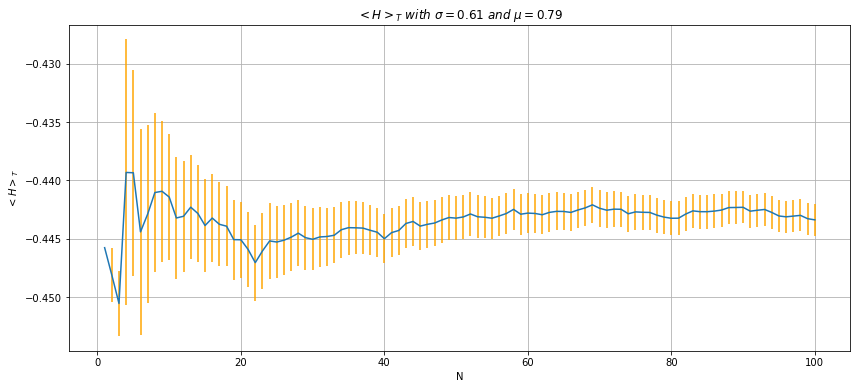

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N, val, stdev = np.loadtxt("es8_1/results/es2.out", usecols=(0,1,2), delimiter=',', unpack='true')

plt.figure(figsize=(14,6))
plt.errorbar(N, val, yerr = stdev, ecolor= 'orange')
plt.title(r"$<H>_T \ with \ \sigma = 0.61 \ and \ \mu = 0.79$")
plt.ylabel(r'$<H>_T$')
plt.xlabel('N')
plt.grid(True)
plt.show()

### Punto 2

Rappresento ora la $|\Psi_T|^2$ ottenuta con la simulazione, con la formula teorica (che normalizzo) e con il metodo di Schrodinger. Noto un buon accordo.

In [3]:
#ISTOGRAMMA OTTENUTO DA SIMULAZIONE
r_samp, psi_samp = np.loadtxt("es8_1/results/hist.out", usecols=(0,1), delimiter=',', unpack='true')

In [18]:
#FORMULA TEORICA
import scipy.integrate as integrate

def psi_theo(x):
    mu = 0.79
    sigma = 0.61
    return np.exp(-pow((x - mu)/(sigma),2)/2) + np.exp (-pow((x+mu)/(sigma),2)/2)

def psi2_theo(x):
    return psi_theo(x)**2

norm, inc = integrate.quad(psi2_theo, -5,5)
norm = np.sqrt(norm)
print ('Normalizzazione della psi teorica vale %.2f' % norm )

Normalizzazione della psi teorica vale 1.60


In [5]:
#METODO DI SCHRODINGER
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 6
N = 500 # number of iterations

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi_schr = np.linalg.eigh(H)

# Take the transpose & normalize
psi_schr = np.transpose(psi_schr)
psi_schr = psi_schr/np.sqrt(dx)

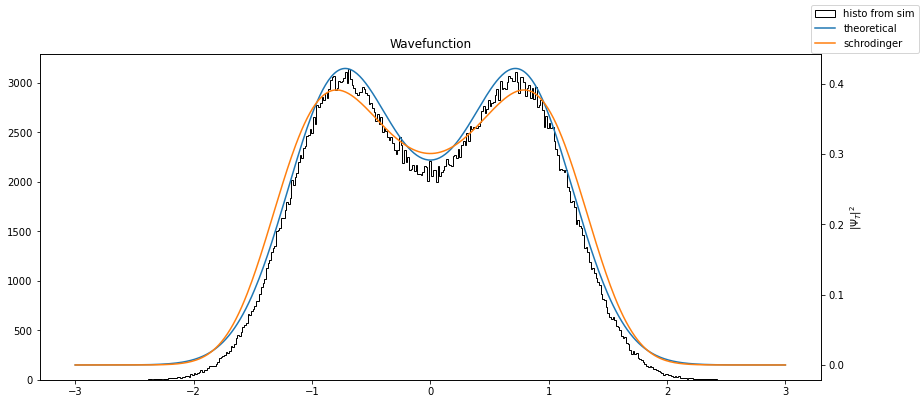

In [19]:
#RAPPRESENTO TUTTO

fig, ax_left = plt.subplots(figsize=(14,6))
ax_right = ax_left.twinx()

plt.title ("Wavefunction")
plt.ylabel(r'$|\Psi_T|^2$')
plt.xlabel('r')
ax_left.hist(r_samp, 400, label = 'histo from sim',histtype='step', color ='k')
ax_right.plot(x, (psi_theo(x)/norm)**2, label = "theoretical")
ax_right.plot(x, (psi_schr[0]**2), label = "schrodinger")
fig.legend()

## Esercizio 3

Partendo dal codice fornito, imposto il potenziale come nell'esercizio precedente e la possibilità di usare una funzione d'onda uniforme $\Psi_T(x)=1$ o analoga a quella dell'esercizio precedente: $\Psi_T(x) = \Psi_T^{\sigma=0.61,\mu=0.79}(x)$. Quale delle due venga utilizzata viene segnalato nel file di input (1 per uniforme, 0 per la trial).

### Punto 1

Confronto i risultati dell'algoritmo PIMC partendo da una funzione d'onda uniforme o da quella trial analoga al caso precedente.

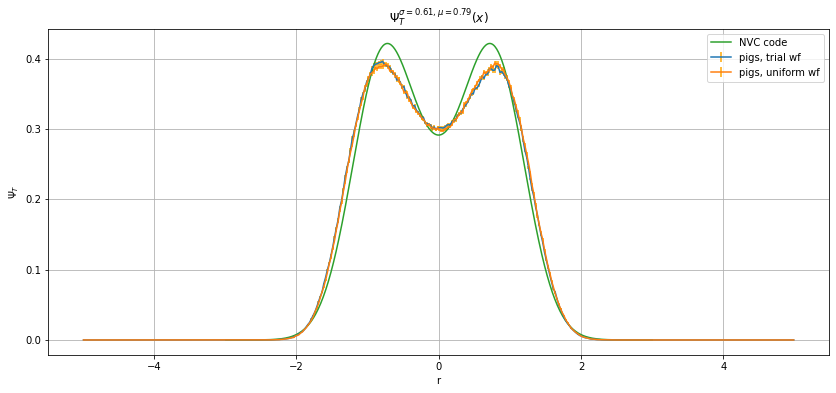

In [25]:
#PIGS 
r, psi_pigsT, stdev_pigsT = np.loadtxt("es8_3/pigs_T/probability.out", usecols=(0,1,2), delimiter=' ', unpack='true')
r, psi_pigsU, stdev_pigsU = np.loadtxt("es8_3/pigs_U/probability.out", usecols=(0,1,2), delimiter=' ', unpack='true')
r_, psi2_NVC = np.loadtxt("es8_1/results/wave.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(14,6))
plt.errorbar(r, psi_pigsT, yerr = stdev_pigsT, ecolor= 'orange', label = 'pigs, trial wf')
plt.errorbar(r, psi_pigsU, yerr = stdev_pigsU, ecolor= 'orange', label = 'pigs, uniform wf')
plt.plot(r_, psi2_NVC/norm**2, label = 'NVC code')
plt.title(r"$\Psi_T^{\sigma=0.61,\mu=0.79}(x)$")
plt.ylabel(r'$\Psi_T$')
plt.xlabel('r')
plt.legend()
plt.grid(True)
plt.show()

### Punto 2 
Eseguo ora simulazioni variando la propagazione del tempo immaginario, da 8 come nel caso precedente fino a 3.

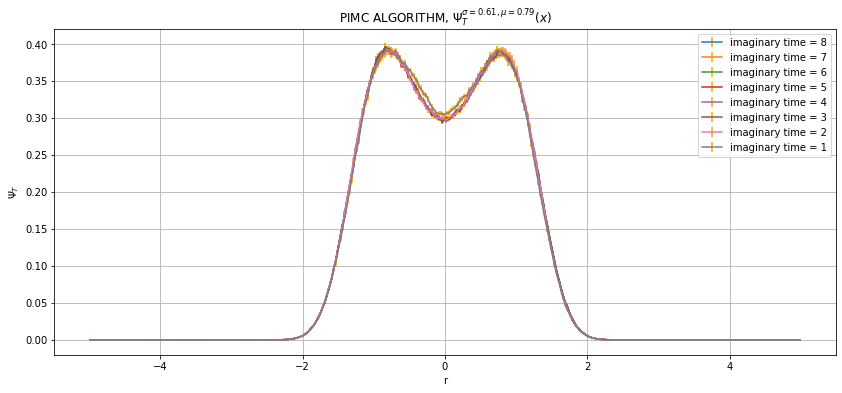

In [26]:
#PIGS variando il tempo immaginario
plt.figure(figsize=(14,6))

for imT in [8,7,6,5,4,3,2,1]:
    r, psi_pigsT, stdev_pigsT = np.loadtxt("es8_3/es1/probability%s.out" %imT, usecols=(0,1,2), delimiter=' ', unpack='true')
    plt.errorbar(r, psi_pigsT, yerr = stdev_pigsT, ecolor= 'orange', label = 'imaginary time = %s' %imT)

#r_, psi_NVC = np.loadtxt("es8_1/results/wave.out", usecols=(0,1), delimiter=',', unpack='true')
#plt.plot(r_, psi_NVC**2/norm, label = 'NVC code')

plt.title(r"PIMC ALGORITHM, $\Psi_T^{\sigma=0.61,\mu=0.79}(x)$")
plt.ylabel(r'$\Psi_T$')
plt.xlabel('r')
plt.legend()
plt.grid(True)
plt.show()

### Punto 3
Vario ora la temperatura iniziale del sistema con l'algoritmo PIMC, da 1.25 K a 50 K.

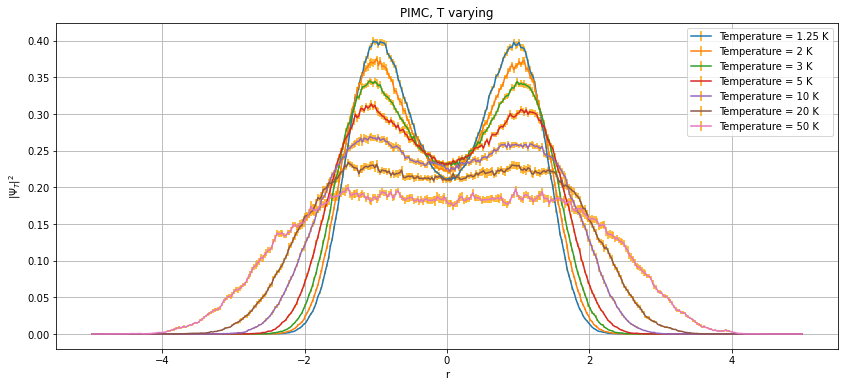

In [28]:
#PIMC variando T

plt.figure(figsize=(14,6))

for T in [1.25, 2,3,5,10,20,50]:
    r, psi_pigsT, stdev_pigsT = np.loadtxt("es8_3/es2/probability%s.out" %T, usecols=(0,1,2), delimiter=' ', unpack='true')
    plt.errorbar(r, psi_pigsT, yerr = stdev_pigsT, ecolor= 'orange', label = 'Temperature = %s K' %T)

plt.title(r"PIMC, T varying")
plt.ylabel(r'|$\Psi_T|^2$')
plt.xlabel('r')
plt.legend()
plt.grid(True)
plt.show()

Aumentando la temperatura, la |$\Psi_T|^2$ perde progressivamente la forma corretta, tendeno a diventare sempre più piatta. 